In [6]:
#import sys
#sys.path.append('../')

In [18]:
from nba_api.stats.endpoints import shotchartdetail
import json 
import requests
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import datetime
import plotly.express as px 
import plotly.graph_objs as go
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot
#from src import make_datasets

In [21]:
teams = pd.read_json('../data/teams.json')

players = pd.read_json('../data/players.json')



#players['playerId'][players['firstName'] == 'Kelly' ].iloc[0]


players['playerId'][(players['firstName'] == 'DeMar') & (players['lastName'] == 'DeRozan')].iloc[0]

201942

In [23]:
#get the team id based on team name 

def get_team_id(team):
    return teams['teamId'][teams['teamName'] == team].iloc[0]

#get the player id 
def get_player_id(first, last):
    return players['playerId'][(players['firstName'] == first) & (players['lastName'] == last)].iloc[0]


print(get_team_id("Boston Celtics"))

1610612738


In [24]:
# Create JSON request
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('San Antonio Spurs'),
            player_id = get_player_id('DeMar', 'DeRozan'),
            #determined which tonext to use for searching for shots pts = made shot
            context_measure_simple = 'FGA', 
            #season of interest
            season_nullable = '2020-21',
            #which portion of the season (pre season, regular, playoffs, all star)
            season_type_all_star = 'Regular Season')

#load data in a dict
shot_data = json.loads(shot_json.get_json())

print(shot_data)

rs', 2, 9, 58, 'Missed Shot', 'Turnaround Jump Shot', '2PT Field Goal', 'In The Paint (Non-RA)', 'Center(C)', '8-16 ft.', 12, 52, 109, 1, 0, '20210109', 'MIN', 'SAS'], ['Shot Chart Detail', '0022000138', 194, 201942, 'DeMar DeRozan', 1610612759, 'San Antonio Spurs', 2, 8, 27, 'Made Shot', 'Jump Shot', '2PT Field Goal', 'In The Paint (Non-RA)', 'Center(C)', 'Less Than 8 ft.', 5, -24, 48, 1, 1, '20210109', 'MIN', 'SAS'], ['Shot Chart Detail', '0022000138', 200, 201942, 'DeMar DeRozan', 1610612759, 'San Antonio Spurs', 2, 7, 49, 'Made Shot', 'Pullup Jump shot', '2PT Field Goal', 'Mid-Range', 'Center(C)', '16-24 ft.', 19, 7, 198, 1, 1, '20210109', 'MIN', 'SAS'], ['Shot Chart Detail', '0022000138', 222, 201942, 'DeMar DeRozan', 1610612759, 'San Antonio Spurs', 2, 6, 16, 'Missed Shot', 'Pullup Jump shot', '2PT Field Goal', 'Mid-Range', 'Left Side(L)', '8-16 ft.', 14, -135, 45, 1, 0, '20210109', 'MIN', 'SAS'], ['Shot Chart Detail', '0022000138', 235, 201942, 'DeMar DeRozan', 1610612759, 'San 

In [26]:
fga = shot_data['resultSets'][0]
# Get the headers and row data
headers = fga['headers']
rows = fga['rowSet']

# Create pandas DataFrame
fga = pd.DataFrame(rows)
fga.columns = headers

#fga['GAME_DATE'] = pd.to_datetime(fga['GAME_DATE'], format='%d/%m/%Y')

fga['GAME_DATE'] = pd.to_datetime(fga.GAME_DATE)
fga.head()
#fga['GAME_DATE'] = fga['GAME_DATE'].to_datetime.datetime.strptime('24052010', "%d%m%Y").date()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022000017,63,201942,DeMar DeRozan,1610612759,San Antonio Spurs,1,6,25,...,Center(C),Less Than 8 ft.,2,-25,15,1,0,2020-12-23,MEM,SAS
1,Shot Chart Detail,0022000017,70,201942,DeMar DeRozan,1610612759,San Antonio Spurs,1,5,37,...,Center(C),Less Than 8 ft.,1,5,11,1,1,2020-12-23,MEM,SAS
2,Shot Chart Detail,0022000017,121,201942,DeMar DeRozan,1610612759,San Antonio Spurs,1,2,29,...,Center(C),8-16 ft.,10,9,100,1,0,2020-12-23,MEM,SAS
3,Shot Chart Detail,0022000017,149,201942,DeMar DeRozan,1610612759,San Antonio Spurs,1,0,0,...,Center(C),Less Than 8 ft.,1,-11,14,1,0,2020-12-23,MEM,SAS
4,Shot Chart Detail,0022000017,317,201942,DeMar DeRozan,1610612759,San Antonio Spurs,2,0,0,...,Center(C),8-16 ft.,9,-48,84,1,1,2020-12-23,MEM,SAS


In [28]:
#final dataset
fga = fga[['ACTION_TYPE','SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG', 'GAME_DATE']]
#fga_curry.SHOT_MADE_FLAG.unique()
fga.head(6)

,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,SHOT_ATTEMPTED_FLAG,GAME_DATE
0,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-25,15,0,1,2020-12-23
1,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,5,11,1,1,2020-12-23
2,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,10,9,100,0,1,2020-12-23
3,Floating Jump shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-11,14,0,1,2020-12-23
4,Turnaround Fadeaway shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,9,-48,84,1,1,2020-12-23
5,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-19,26,0,1,2020-12-23


In [31]:
#plot missed shots by Steph Curry

shot_trace = go.Scatter(
    x = fga[fga['SHOT_MADE_FLAG'] == 1]['LOC_X'],
    y = fga[fga['SHOT_MADE_FLAG'] == 1]['LOC_Y'],
    mode = 'markers'
)

data = [shot_trace]
layout = go.Layout(
    showlegend=False,
    height=600,
    width=600,
    title = 'Shot Location'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [33]:
#Creating the court 

#The X-axis and Y-axis of the court chart will range from -300 to 300 and -100 to 500 respectivvely, 10 units on the chart scale is equal to 1 feet.

#here, the point (x0, y0) and (x1, y1) represents the bottom-left and top-right points of the rectangle

court_shapes = []

outer_lines_shape = dict(
    type='rect',
    xref='x',
    yref='y',
    x0='-250',
    y0='-47.5',
    x1='250',
    y1='422.5',
    line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(outer_lines_shape)

#bball hoop, we draw it using a circle shape. The center of the circle is at the origin of the graph, with the radius being 7.5 unit. 

hoop_shape = dict(
    type='circle',
    xref='x',
    yref='y',
    x0='7.5',
    y0='7.5',
    x1='-7.5',
    y1='-7.5',
    line=dict(
        color = "#0a0a0a", #'rgba=(10, 10, 10, 1)',
        width = 1
    )
)
court_shapes.append(hoop_shape)

#basket backboard 
#The backboard is a raised vvertical board with a basket attached. It's 72 inches (60 unit) wide. 

backboard_shape = dict(
    type='rect',
    xref='x',
    yref='y',
    x0='-30',
    y0='-7.5',
    x1='30',
    y1='-6.5',
    line=dict(
        color = "#0a0a0a", #'rgba=(10, 10, 10, 1)',
        width=1
    ),
    fillcolor = "#0a0a0a", #'rgba=(10, 10, 10, 1)'
)
court_shapes.append(backboard_shape)


#outer box of three-second area
# it's a rectangle with 16ft. in width and 19ft in lenght 

outer_three_sec_shape = dict(
    type='rect',
    xref='x',
    yref='y',
    x0='-80',
    y0='-47.5',
    x1='80',
    y1='143.5',
    line=dict(
        color = "#0a0a0a", #'rgba=(10, 10, 10, 1)',
        width=1
    )
)
court_shapes.append(outer_three_sec_shape)


#inner box of three-second area, it's a rectangle with 12ft. in width and 19ft in length. 

inner_three_sec_shape = dict(
  type='rect',
  xref='x',
  yref='y',
  x0='-60',
  y0='-47.5',
  x1='60',
  y1='143.5',
  line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width=1
  )
)

court_shapes.append(inner_three_sec_shape)


#Three-point line (left) -- The point (x0, y0) and (x1, y1) represnets the edges of the line. 
left_line_shape = dict(
  type='line',
  xref='x',
  yref='y',
  x0='-220',
  y0='-47.5',
  x1='-220',
  y1='92.5',
  line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(left_line_shape)

#three-point line (right)
right_line_shape = dict(
  type='line',
  xref='x',
  yref='y',
  x0='220',
  y0='-47.5',
  x1='220',
  y1='92.5',
  line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(right_line_shape)


#three-point arc, we used Curvve Command (C) to draw the half circle (arc) path. 

three_point_arc_shape = dict(
  type='path',
  xref='x',
  yref='y',
  path='M -220 92.5 C -70 300, 70 300, 220 92.5',
  line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(three_point_arc_shape)


#Center cicle 

center_circle_shape = dict(
  type='circle',
  xref='x',
  yref='y',
  x0='60',
  y0='482.5',
  x1='-60',
  y1='362.5',
  line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(center_circle_shape)

#restraining circle 
res_circle_shape = dict(
  type='circle',
  xref='x',
  yref='y',
  x0='20',
  y0='442.5',
  x1='-20',
  y1='402.5',
  line=dict(
      color = "#0a0a0a",#'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(res_circle_shape)

#free-throw circle 
free_throw_circle_shape = dict(
  type='circle',
  xref='x',
  yref='y',
  x0='60',
  y0='200',
  x1='-60',
  y1='80',
  line=dict(
      color = "#0a0a0a",#'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(free_throw_circle_shape)

#restricted area, we are using the dash property to style the circle
res_area_shape = dict(
  type='circle',
  xref='x',
  yref='y',
  x0='40',
  y0='40',
  x1='-40',
  y1='-40',
  line=dict(
    color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
    width = 1,
    dash = 'dot'
  )
)

court_shapes.append(res_area_shape)
#Creating the court 

#The X-axis and Y-axis of the court chart will range from -300 to 300 and -100 to 500 respectivvely, 10 units on the chart scale is equal to 1 feet.

#here, the point (x0, y0) and (x1, y1) represents the bottom-left and top-right points of the rectangle

court_shapes = []

outer_lines_shape = dict(
    type='rect',
    xref='x',
    yref='y',
    x0='-250',
    y0='-47.5',
    x1='250',
    y1='422.5',
    line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(outer_lines_shape)

#bball hoop, we draw it using a circle shape. The center of the circle is at the origin of the graph, with the radius being 7.5 unit. 

hoop_shape = dict(
    type='circle',
    xref='x',
    yref='y',
    x0='7.5',
    y0='7.5',
    x1='-7.5',
    y1='-7.5',
    line=dict(
        color = "#0a0a0a", #'rgba=(10, 10, 10, 1)',
        width = 1
    )
)
court_shapes.append(hoop_shape)

#basket backboard 
#The backboard is a raised vvertical board with a basket attached. It's 72 inches (60 unit) wide. 

backboard_shape = dict(
    type='rect',
    xref='x',
    yref='y',
    x0='-30',
    y0='-7.5',
    x1='30',
    y1='-6.5',
    line=dict(
        color = "#0a0a0a", #'rgba=(10, 10, 10, 1)',
        width=1
    ),
    fillcolor = "#0a0a0a", #'rgba=(10, 10, 10, 1)'
)
court_shapes.append(backboard_shape)


#outer box of three-second area
# it's a rectangle with 16ft. in width and 19ft in lenght 

outer_three_sec_shape = dict(
    type='rect',
    xref='x',
    yref='y',
    x0='-80',
    y0='-47.5',
    x1='80',
    y1='143.5',
    line=dict(
        color = "#0a0a0a", #'rgba=(10, 10, 10, 1)',
        width=1
    )
)
court_shapes.append(outer_three_sec_shape)


#inner box of three-second area, it's a rectangle with 12ft. in width and 19ft in length. 

inner_three_sec_shape = dict(
  type='rect',
  xref='x',
  yref='y',
  x0='-60',
  y0='-47.5',
  x1='60',
  y1='143.5',
  line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width=1
  )
)

court_shapes.append(inner_three_sec_shape)


#Three-point line (left) -- The point (x0, y0) and (x1, y1) represnets the edges of the line. 
left_line_shape = dict(
  type='line',
  xref='x',
  yref='y',
  x0='-220',
  y0='-47.5',
  x1='-220',
  y1='92.5',
  line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(left_line_shape)

#three-point line (right)
right_line_shape = dict(
  type='line',
  xref='x',
  yref='y',
  x0='220',
  y0='-47.5',
  x1='220',
  y1='92.5',
  line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(right_line_shape)


#three-point arc, we used Curvve Command (C) to draw the half circle (arc) path. 

three_point_arc_shape = dict(
  type='path',
  xref='x',
  yref='y',
  path='M -220 92.5 C -70 300, 70 300, 220 92.5',
  line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(three_point_arc_shape)


#Center cicle 

center_circle_shape = dict(
  type='circle',
  xref='x',
  yref='y',
  x0='60',
  y0='482.5',
  x1='-60',
  y1='362.5',
  line=dict(
      color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(center_circle_shape)

#restraining circle 
res_circle_shape = dict(
  type='circle',
  xref='x',
  yref='y',
  x0='20',
  y0='442.5',
  x1='-20',
  y1='402.5',
  line=dict(
      color = "#0a0a0a",#'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(res_circle_shape)

#free-throw circle 
free_throw_circle_shape = dict(
  type='circle',
  xref='x',
  yref='y',
  x0='60',
  y0='200',
  x1='-60',
  y1='80',
  line=dict(
      color = "#0a0a0a",#'rgba(10, 10, 10, 1)',
      width = 1
  )
)

court_shapes.append(free_throw_circle_shape)

#restricted area, we are using the dash property to style the circle
res_area_shape = dict(
  type='circle',
  xref='x',
  yref='y',
  x0='40',
  y0='40',
  x1='-40',
  y1='-40',
  line=dict(
    color = "#0a0a0a", #'rgba(10, 10, 10, 1)',
    width = 1,
    dash = 'dot'
  )
)

court_shapes.append(res_area_shape)


In [35]:
fga.head()

,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,SHOT_ATTEMPTED_FLAG,GAME_DATE
0,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-25,15,0,1,2020-12-23
1,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,5,11,1,1,2020-12-23
2,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,10,9,100,0,1,2020-12-23
3,Floating Jump shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-11,14,0,1,2020-12-23
4,Turnaround Fadeaway shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,9,-48,84,1,1,2020-12-23


In [ ]:
#charting the shot hexbin

xlocs = fga['LOC_X']
ylocs = fga['LOC_Y']

fig = go.Figure()
fig.add_trace(go.Scatter)(
    x =xlocs, y=ylocs, mode='markers', name='markers',
    marker=dict(
        size=
    )

)

In [40]:
#Charting the shots 

made_shot_trace = go.Scatter(
    x = fga[fga['SHOT_MADE_FLAG'] == 1]['LOC_X'],
    y = fga[fga['SHOT_MADE_FLAG'] == 1]['LOC_Y'],
    mode = 'markers',
    name = 'Made Shot',
    marker = dict(
        size = 5,
        color = "#00ff00", #'rgba(255, 255, 0, .8)',
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0, 1)'
        )
    )
)

missed_shot_trace = go.Scatter(
    x = fga[fga['SHOT_MADE_FLAG'] == 0]['LOC_X'],
    y = fga[fga['SHOT_MADE_FLAG'] == 0]['LOC_Y'],
    mode = 'markers',
    name = 'Missed Shot',
    marker = dict(
        size = 5,
        color = '#ff0000',#'rgba(255, 255, 0, .8)',
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0, 1)'
        )
    )
)


data = [missed_shot_trace, made_shot_trace]

layout = go.Layout(
    title='Shots by DeMar DeRozan in NBA season 2020-2021',
    showlegend=True,
    xaxis=dict(
        showgrid=False,
        range=[-300, 300]
    ),
    yaxis=dict(
        showgrid=False,
        range=[-100, 500]
    ),
    height=600,
    width=650,
    shapes=court_shapes
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


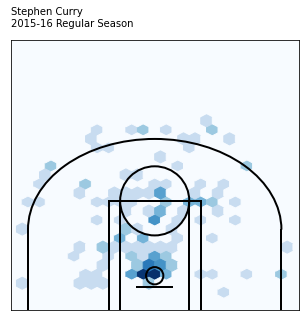